<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/Main_ANACOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In ANOVA vs ANCOVA, ANOVA stands for Analysis of Variance, and ANCOVA stands for Analysis of Covariance. The primary difference between both methods used to analyze the variance in the mean values is that the ANCOVA method is used when there are covariates (denoting the continuous independent variable), and ANOVA is appropriate when there are no covariates. In essence, in ANOVA, the independent variables are all of the categorical types, and In ANCOVA, the independent variables can be categoric and continuous types.

Simply, ANACOVA evaluates the mean of a dependent variable based on a categorical independent variable while considering and contorlling the effects of covariates

In [17]:
# Install libraries
import pandas as pd
import numpy as np
import statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy 
from scipy.stats import mannwhitneyu, fisher_exact, ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic
%matplotlib inline

plt.rcParams['figure.figsize'] = (8.0, 7.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


print("libraries installed succesfully!")

libraries installed succesfully!


In [18]:
#create data
df = pd.DataFrame({'technique': np.repeat(['A', 'B', 'C'], 5),
                   'current_grade': [67, 88, 75, 77, 85,
                                     92, 69, 77, 74, 88, 
                                     96, 91, 88, 82, 80],
                   'exam_score': [77, 89, 72, 74, 69,
                                  78, 88, 93, 94, 90,
                                  85, 81, 83, 88, 79]})
#view data 
df.head()

,technique,current_grade,exam_score
0,A,67,77
1,A,88,89
2,A,75,72
3,A,77,74
4,A,85,69


We would like to  understand if there is a realtionship between the technique and exam score in relation to the current_grade 

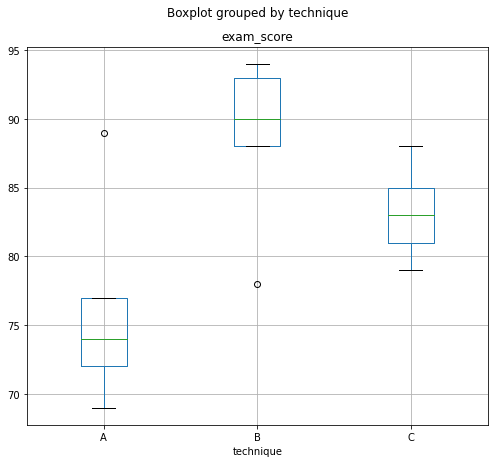

In [19]:
# box plot for marks column
df.boxplot(column='exam_score', by = 'technique')
plt.show()

In [20]:
reg = ols('exam_score~technique+current_grade', data = df).fit()

aov = sm.stats.anova_lm(reg, type = 2)
print(aov)

                 df      sum_sq     mean_sq         F    PR(>F)
technique       2.0  386.533333  193.266667  4.760198  0.032407
current_grade   1.0    4.193886    4.193886  0.103296  0.753934
Residual       11.0  446.606114   40.600556       NaN       NaN


From the ANCOVA table we see that the p-value (p-unc = “uncorrected p-value”) for study technique is 0.03155. Since this value is less than 0.05, we can reject the null hypothesis that each of the studying techniques leads to the same average exam score, even after accounting for the student’s current grade in the class.

In [21]:
# To undesrstand which technique has signifacnt mean difference on exam score we perform a posthoc analysis ( multiple comparison of means)
mc = pairwise_tukeyhsd(df['exam_score'], df['technique'], alpha = 0.05)
print(mc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     12.4 0.0194   2.0582 22.7418   True
     A      C      7.0 0.2092  -3.3418 17.3418  False
     B      C     -5.4  0.375 -15.7418  4.9418  False
-----------------------------------------------------


# Using Pongoiun library

In [22]:
!pip install pingouin
from pingouin import ancova

#perform ANCOVA
ancova(data=df, dv='exam_score', covar='current_grade', between='technique')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Source,SS,DF,F,p-unc,np2
0,technique,390.575130,2,4.809973,0.031556,0.466536
1,current_grade,4.193886,1,0.103296,0.753934,0.009303
2,Residual,446.606114,11,NaN,NaN,NaN


Two-Way ANACOVA

In [23]:
from pingouin import ancova, read_dataset
df = read_dataset('ancova')

df.head(10)

,Scores,Income,BMI,Method
0,12,17.5,20,A
1,39,104.6,20,A
2,36,64.7,24,A
3,17,47.0,19,A
4,25,22.0,21,A
5,15,12.4,28,A
6,8,20.0,29,A
7,31,79.7,27,A
8,45,70.8,24,B
9,37,45.9,19,B


In [24]:
ancova(data=df, dv='Scores', covar=['Income', 'BMI'], between='Method',
       effsize="n2")

,Source,SS,DF,F,p-unc,n2
0,Method,552.284043,3,3.232550,0.036113,0.141802
1,Income,1573.952434,1,27.637304,0.000011,0.404121
2,BMI,60.013656,1,1.053790,0.312842,0.015409
3,Residual,1708.508657,30,NaN,NaN,NaN
